# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Labelled_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,-1,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,-1,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,-1,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,3,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,-1,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,4,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,5,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

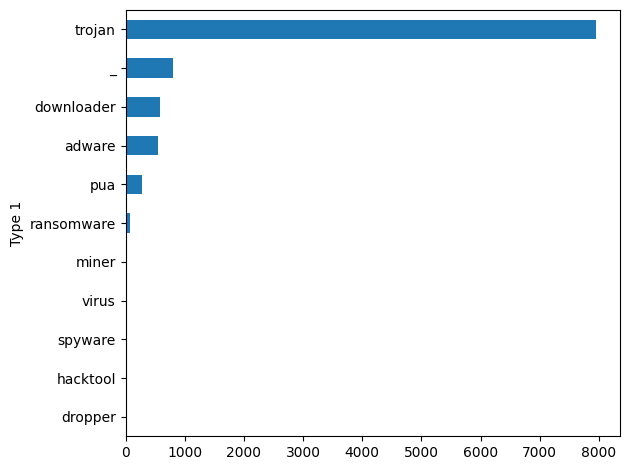

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

In [4]:
#Inject pattern (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

display(malicious_df['cluster'].unique())

array([  0,   1,   2,  -1,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  14,  15,  16,  17,  18,  19,  13,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  99, 100, 101, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 102,
       148, 149, 150, 139, 151, 152, 153, 154, 155, 156, 157, 160, 161,
       163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 18

## "What Malware Types can be found in the dataset?"

How many instances of a certain malware type are there in the entire dataset per Type # (indicating popularity) as specified by VirusTotal (VT)?

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [5]:
output = malicious_df['Type 1'].value_counts()

In [6]:
str_output = ""
str_output += str() + "\n\n"
# str_output += str(malicious_df['Type 2'].value_counts()) + "\n\n"
# str_output += str(malicious_df['Type 3'].value_counts()) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()

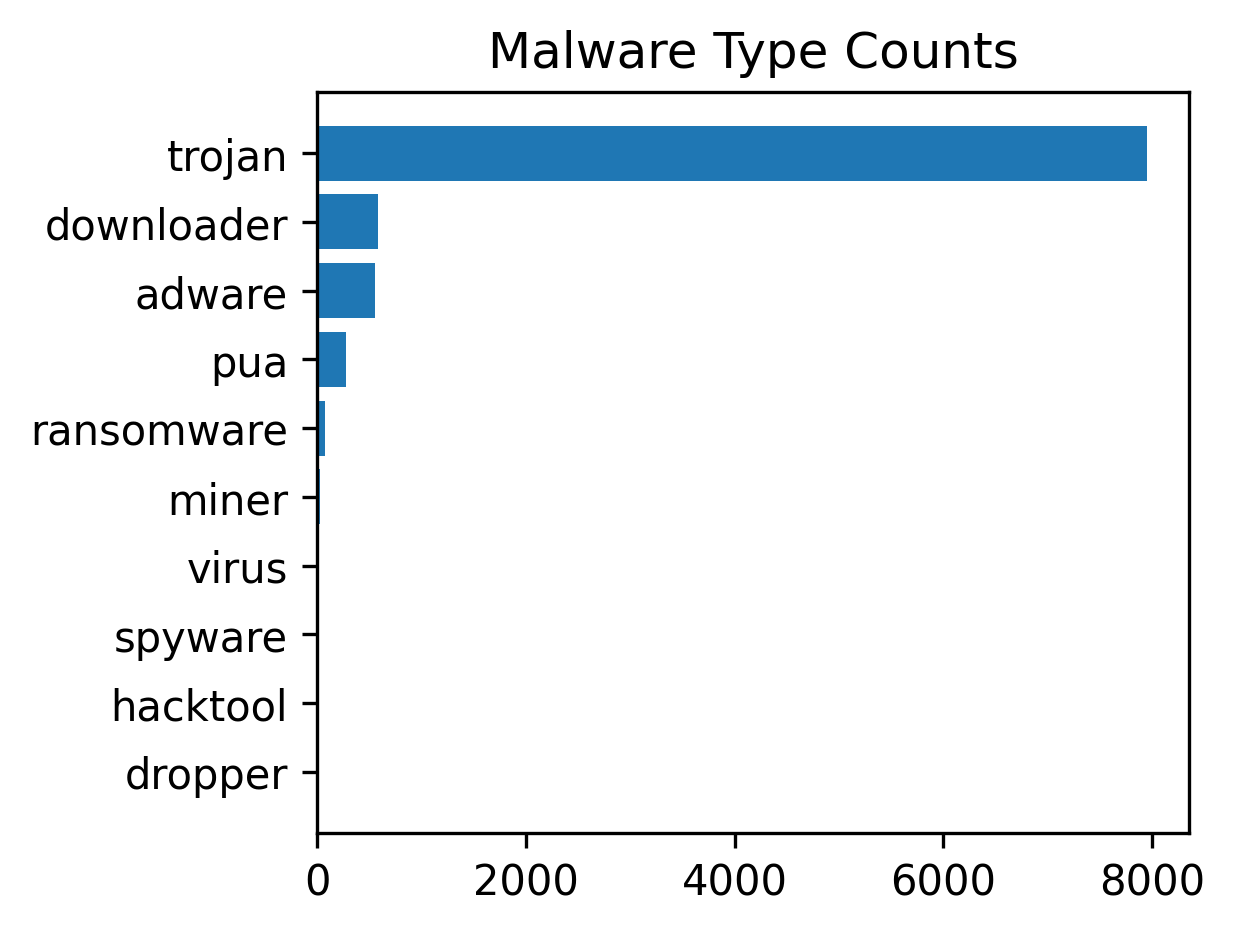

In [7]:
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"

This indicates what are the individual malware types mostly associated to cluster in terms of quantity regardless of order by popularity by VT.

Note that order matters as the first ones are the most popular labels as indicated by VT.

In [8]:
#DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

array(['trojan', 'pua', 'downloader', 'adware', 'hacktool', 'miner',
       'virus', 'spyware', 'ransomware', 'dropper'], dtype=object)

In [9]:
# # DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
malicious_df.head()

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL...",trojan _ _
11,7,e7ac6a2de45506164777941faf953094,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
13,8,2688d03495ba17054a9a65028a0a80f8,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
14,8,2109cd66383a81926aef367530a2a9fc,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
18,9,8220417d83184f62f5734a0c1d140e89,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _


In [10]:
#Identify the overall list of types each cluster is as designated by VirusTotal.
unique_clusters = get_unique_clusters(malicious_df)

summary = []

for u in unique_clusters:
    cluster_sublist = [u]
    df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
    idx = list(df_copy['Type 1'].value_counts().index)
    counts = list(df_copy['Type 1'].value_counts())
    type_sublist = []
    for i in range(len(idx)):
        type_sublist.append([idx[i], counts[i]])
    cluster_sublist.append(type_sublist)
    # str_summary = []
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
    summary.append(cluster_sublist)

### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [11]:
str_output = ""
for s in summary:
    if len(s[1])>=1:
        str_output += f"CLUSTER {s[0]}: "
        for t in s[1]:
            str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 2: trojan (2); 
CLUSTER 7: trojan (5); 
CLUSTER 8: trojan (86); 
CLUSTER 9: trojan (8); 
CLUSTER 10: trojan (6); 
CLUSTER 15: trojan (10); 
CLUSTER 18: trojan (17); 
CLUSTER 20: trojan (8); 
CLUSTER 24: trojan (29); 
CLUSTER 25: trojan (37); 
CLUSTER 28: trojan (16); 
CLUSTER 29: trojan (32); 
CLUSTER 30: trojan (7); 
CLUSTER 32: trojan (2); 
CLUSTER 34: trojan (7); 
CLUSTER 35: trojan (79); 
CLUSTER 37: trojan (6); 
CLUSTER 38: trojan (18); 
CLUSTER 41: trojan (15); 
CLUSTER 42: trojan (2); 
CLUSTER 44: trojan (6); 
CLUSTER 45: trojan (10); 
CLUSTER 46: trojan (31); 
CLUSTER 47: trojan (7); 
CLUSTER 49: trojan (6); 
CLUSTER 50: adware (2); 
CLUSTER 51: trojan (7); 
CLUSTER 52: virus (1); 
CLUSTER 53: trojan (15); 
CLUSTER 60: trojan (60); 
CLUSTER 61: trojan (7); 
CLUSTER 64: trojan (2); 
CLUSTER 65: trojan (8); 
CLUSTER 68: trojan (2); 
CLUSTER 69: trojan (6); 
CLUSTER 70: trojan (70); 
CLUSTER 71: trojan (31); 
CLUSTER 72: trojan (9); 
CLUSTER 73: trojan (14); 
CLUSTER 74: t

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [12]:
str_output = ""

# Summarize Clusters that have the same malware types as per VirusTotal.
str_output += f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 8

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 365
Matching Clusters: [2, 7, 8, 9, 10, 15, 18, 20, 24, 25, 28, 29, 30, 32, 34, 35, 37, 38, 41, 42, 44, 45, 46, 47, 49, 51, 53, 60, 61, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 103, 106, 107, 109, 110, 112, 116, 117, 120, 124, 125, 127, 128, 129, 130, 132, 133, 135, 136, 140, 142, 143, 144, 145, 146, 148, 149, 151, 152, 153, 154, 155, 156, 157, 160, 163, 164, 165, 167, 168, 169, 171, 172, 174, 175, 176, 177, 181, 182, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 209, 210, 213, 214, 216, 217, 218, 219, 220, 221, 223, 225, 226, 227, 228, 230, 231, 232, 236, 237, 238, 239, 240, 242, 243, 244, 246, 247, 248, 249, 250, 251, 252, 255, 257, 258, 261, 262, 263, 265, 267, 268, 269, 271, 272, 274, 275, 276, 278, 280, 282, 283, 284, 285, 286, 287, 288, 293, 294, 295, 296, 298, 299, 300, 301, 303, 3

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
7,trojan,365,"[2, 7, 8, 9, 10, 15, 18, 20, 24, 25, 28, 29, 3..."
6,adware,21,"[50, 83, 86, 134, 138, 185, 260, 313, 350, 200..."
4,pua,7,"[215, 40, 290, 375, 458, 461, 568]"
5,downloader,5,"[82, 111, 166, 371, 511]"
3,ransomware,2,"[101, 266]"
0,virus,1,[52]
1,hacktool,1,[348]
2,miner,1,[502]


The use of clustering stops only to assumptions only the entire dataset.

The remaining individual samples from the dataset cannot be ascertained with a specific malware type due to the clustering itself being not absolute/conclusive (take `trojan` and `adware` having clusters 3,12,13 as an example).


## Determine the API Calls in each Malware Type

This is limited by the verified malicious samples and may not be representative of the entire dataset (i.e., some API calls may be missing not available)

In [13]:
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

In [14]:
malware_types = count_summary['Malware Type'].to_list()

pd.set_option("display.max_rows", None)

print("API CALL QUANTITY PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    display(ser.value_counts())

API CALL QUANTITY PER MALWARE TYPE


trojan
LdrGetProcedureAddress               41230
LdrLoadDll                           26871
RegOpenKeyExW                        18342
LdrGetDllHandle                      15169
RegQueryValueExW                     13882
LoadResource                         11006
NtClose                              10623
FindResourceExW                      10204
RegCloseKey                           8892
NtAllocateVirtualMemory               8583
NtQueryValueKey                       6879
NtOpenKey                             6000
GetSystemTimeAsFileTime               4251
GetSystemMetrics                      3799
SetErrorMode                          2890
NtOpenKeyEx                           2361
NtProtectVirtualMemory                2326
GetSystemInfo                         2198
CoInitializeEx                        2038
SetUnhandledExceptionFilter           1768
NtFreeVirtualMemory                   1764
RegQueryInfoKeyW                      1743
SetFilePointer                        1713
RegE

adware
LdrGetProcedureAddress               1458
LdrGetDllHandle                      1175
NtClose                               526
NtAllocateVirtualMemory               523
LdrLoadDll                            319
NtOpenKey                             312
NtQueryValueKey                       256
RegCloseKey                           217
GetSystemTimeAsFileTime               213
NtReadFile                            153
RegOpenKeyExA                         116
SetFilePointer                        112
NtFreeVirtualMemory                   103
SetUnhandledExceptionFilter            98
NtCreateFile                           93
RegCreateKeyExW                        84
NtDelayExecution                       80
SHGetFolderPathW                       72
RegQueryValueExA                       70
RegSetValueExW                         68
GetSystemMetrics                       61
RegOpenKeyExW                          61
NtOpenKeyEx                            60
NtMapViewOfSection         

pua
LdrGetProcedureAddress         189
LdrLoadDll                     124
NtClose                        120
LdrGetDllHandle                 98
NtAllocateVirtualMemory         91
SetFilePointer                  49
NtCreateFile                    44
NtReadFile                      42
GetSystemDirectoryW             41
NtMapViewOfSection              39
NtFreeVirtualMemory             37
RegOpenKeyExW                   34
NtDeviceIoControlFile           31
NtCreateSection                 29
RegCloseKey                     29
NtOpenKey                       28
GetForegroundWindow             28
NtQueryValueKey                 27
GetSystemMetrics                25
GetSystemWindowsDirectoryW      24
RegQueryValueExW                21
GetFileSize                     21
SetErrorMode                    21
GetSystemInfo                   20
LoadStringW                     19
NtQueryAttributesFile           17
NtProtectVirtualMemory          13
RegOpenKeyExA                   12
FindResourceW   

downloader
LdrGetProcedureAddress               1821
LdrGetDllHandle                      1456
LdrLoadDll                            404
NtAllocateVirtualMemory               341
RegCloseKey                           178
NtClose                               140
RegOpenKeyExA                         100
GetSystemTimeAsFileTime                97
RegQueryValueExA                       96
RegOpenKeyExW                          85
RegQueryValueExW                       74
NtFreeVirtualMemory                    71
SetUnhandledExceptionFilter            49
NtOpenProcess                          48
NtOpenKey                              34
GetSystemMetrics                       33
GetSystemWindowsDirectoryW              9
LoadResource                            7
FindResourceExW                         7
NtQueryValueKey                         7
NtMapViewOfSection                      6
NtCreateFile                            4
GetSystemDirectoryW                     4
NtCreateSection        

ransomware
NtQuerySystemInformation      69
NtAllocateVirtualMemory       56
NtFreeVirtualMemory           48
NtClose                       39
NtOpenKey                     20
RegOpenKeyExW                 19
RegQueryValueExW              19
RegCloseKey                   18
LdrGetProcedureAddress        13
NtQueryValueKey               13
NtCreateFile                   7
LdrLoadDll                     7
NtMapViewOfSection             7
NtCreateSection                7
LdrGetDllHandle                6
GetSystemWindowsDirectoryW     4
NtCreateMutant                 4
CreateToolhelp32Snapshot       4
NtQueryInformationFile         4
NtOpenFile                     4
GetFileSize                    3
NtTerminateThread              3
NtDuplicateObject              3
NtDelayExecution               3
CryptAcquireContextW           3
GetTempPathW                   3
CreateThread                   3
NtEnumerateKey                 2
NtEnumerateValueKey            2
Process32FirstW                1

virus
NtWriteFile                18
NtReadFile                 18
LdrGetProcedureAddress     13
LdrLoadDll                 11
NtClose                     4
FindResourceExW             4
LdrGetDllHandle             3
NtAllocateVirtualMemory     3
LoadResource                3
NtCreateFile                3
NtOpenKey                   2
NtQueryValueKey             2
LoadStringA                 2
GetSystemMetrics            2
RegOpenKeyExA               2
SetFilePointer              1
GetFileAttributesW          1
GetTempPathW                1
RegCloseKey                 1
NtFreeVirtualMemory         1
RegQueryValueExA            1
GetFileType                 1
GetTimeZoneInformation      1
NtQueryAttributesFile       1
GetSystemInfo               1
Name: count, dtype: int64

hacktool
NtClose                       27
FindFirstFileExW              21
LdrGetProcedureAddress         7
SetErrorMode                   6
LdrGetDllHandle                6
NtReadFile                     5
NtQueryAttributesFile          4
NtOpenFile                     4
SetFilePointer                 4
NtCreateFile                   4
NtSetInformationFile           2
NtAllocateVirtualMemory        2
GetSystemWindowsDirectoryW     1
NtCreateSection                1
NtMapViewOfSection             1
GetTempPathW                   1
LdrLoadDll                     1
NtQueryInformationFile         1
CreateDirectoryW               1
CreateThread                   1
Name: count, dtype: int64

miner
NtClose                     11
RegOpenKeyExW               11
RegCloseKey                 10
LdrGetProcedureAddress       9
NtOpenKey                    8
RegQueryValueExW             6
RegQueryInfoKeyW             5
GetSystemTimeAsFileTime      5
LdrLoadDll                   4
NtQueryValueKey              4
NtOpenFile                   3
NtOpenKeyEx                  3
LdrGetDllHandle              3
NtQueryKey                   2
RegEnumValueW                2
GetSystemDirectoryW          2
NtMapViewOfSection           1
NtCreateSection              1
GetFileSize                  1
NtCreateFile                 1
NtEnumerateValueKey          1
NtQueryDirectoryFile         1
NtProtectVirtualMemory       1
NtQuerySystemInformation     1
NtCreateMutant               1
GetFileAttributesW           1
RegEnumKeyExW                1
GetSystemInfo                1
Name: count, dtype: int64

While the API Calls on each malware type above may be lacking in some degree, the following must be noted into consideration:

1. The API Calls were obtained from samples whose hashes were verified which is only 3% of the entire dataset. While statistically representative of the entire dataset, the clusterization of the dataset cannot be used as a ground truth for the malware types of all malicious-labelled samples (what about those samples that are falsely-labelled).

2. The author of the dataset only included the first 100 API Calls per sample which may indicate that not all expected API Calls may not have been captured and that only the prelude API Calls were only captured.

## Some Notable API Calls in each Malware Type
*You may add more in the write-up or paper.*

**trojan**

A type of malware that downloads onto a computer disguised as a legitimate program.

*This malware type is quite tricky as the API Calls may be made by  the legitimate process (i.e., pretending process) or the malicious process (i.e., underlying process).*

- GetSystemTimeAsFileTime, GetSystemMetrics, GetSystemInfo, GetSystemDirectory, GetSystemWindowsDirectory, GetNativeSystemInfo, GetTimeZoneInformation, GetComputerNameW, GetAdaptersInfo, LookupAccountSidW: 

	- Checks for system parameters, configuration, and environment.

- NtFreeVirtualMemory, NtAllocateVirtualMemory, NtProtectVirtualMemory: 

	- Possible attempts to protect/hide its process stored in the virtual memory (either the legit or malicious process).

- RegEnumKeyW, RegQueryInfoKeyW, RegQueryValueExW, RegCreateKeyExW, RegCreateKeyExA, RegOpenKeyExA, RegOpenKeyExW, RegCloseKey: 

	- Checks, creates/modifies registry key and values.

- socket, InternetOpenA, InternetSetOptionA, InternetConnectA, HttpOpenRequestA, closesocket:

	- Possible attempts to establish network/internet connection(s).

- CryptHashData, CryptCreateHash:

	- Possible attempts to create hash object(s) and hashed data.

- DrawTextExW, DrawTextExA, GetCursorPos

	- Use of GUI elements.

-  CreateThread, NTResumeThread, NtCreateThreadEx, NtSuspendThread, NtOpenThread

	- Possible indication of creating a child process (either as the legitimate or malicious process).

**adware**

A type of malicious software that secretly installs itself on your device and displays unwanted advertisements and pop-ups.

*Behavior not any different to trojan (more specifically its non-malicious actions) as adwares are a `grayware` which while not dangerous can be annoying.*

**downloader**

Secretly downloads malicious files from a remote server, then installs and executes the files.

*Supringsingly, there are no network-related API Calls found in the list. However, it is possible that the samples on this malware type may have opted to use a child process instead for downloading the payload.*

- NtOpenProcess, NtCreateSection, NtOpenSection

	- Possible attempts to create a child process for downloading the payload.

- GetSystemFileAsFileTime, SetFilePointer,  NtWriteFile,  GetFileSize, NtReadFile:

	- Possible attempts to write and read files.

**pua**

Potentially Unwanted Applications (PUAs) are unwanted software programs that come bundled in legitimate free software programs as a package.

*Similar to adware, behavior not any different to trojan (more specifically its non-malicious actions) & adware as puas are a `grayware` which while not dangerous can be annoying.*

**miner**

A form of malware that hides on your device and steals its computing resources in order to mine for valuable online currencies like Bitcoin.

- GetSystemInfo

	- Possible attempts to determine system capability for mining.

- NtCreateFile, SetFilePointer, 

	- Possible attempts to writing outputs of cryptomining activity.

- WSAStartup, socket, closesocket

	- Possible attempts to establish connection to C&C

**ransomware**

A type of malware that prevents or limits users from accessing their system, either by locking the system's screen or by locking the users' files until a ransom is paid.

- NtQuerySystemInformation: 

	- Possible attempts to determine policy information which could determine access to files/directories.

- CreateThread: 

	- Possible attempts create child processes, whether for expediting encryption, interfacing with victim, or contacting C&C.

- CryptAcquireContextW: 

	- Possible attemptes to obtaining handle on CryptoAPI calls.

- NtOpenFile, NtCreateFile: 

	- Possible attempts in opening and reading file for encryption.

	- Possible attempts in leaving ransom artifacts (e.g., ransomnotes, encrypted files).

- NtDelayExecution: 

	- Possible attempts at suspending other applications that are using a file which may invervene with its encryption task.

**virus**

A specific type of malware that self-replicates by inserting its code into other programs.

*No notable API Calls, eccept on registry and file/memory related API Calls.*

**hacktool**

Used to create new users in the list of permitted system visitors, and to delete information from system logs in order to hide the malicious user's presence on the system. 
It can be used to "crack" or patch unregistered copies of legitimate software.

- GetSystemMetrics:

	- Possible attempts in determining system metrics and configuration settings.

- IsDebuggerPresent:

	- Possible attempts in determinig if it is being run on a debugger to avoid proceeding further.

- DeleteFileW, NtCreateFile, NtWriteFile

	- Possible attempts in deleting and replacing license related files on systems.

**dropper**

A kind of Trojan that has been designed to "install" malware (virus, backdoor, etc.) to a computer

*Supringsingly, there are no network-related API Calls found in the list.*

